# Introduction to the Effective Mass Model

In solids, carrier transport can often be described in the Boltzmann transport theory framework. We do not delve into the derivation of the transport parameters in details here. For more details we refer the reader to the classic texts on this topic [[V. I. Fistul’, Heavily Doped Semiconductors, Springer, New
York, 1969](https://doi.org/10.1007/978-1-4684-8821-0); [P. S. Kireev, Semiconductor Physics, Mir Publishers, Moscow,
1978](https://www.amazon.com/Semiconductor-Physics-P-S-Kireev/dp/0714712329); [B.M. Askerov, Electron Transport Phenomena in Semiconduc-
tors, World Scientific, Singapore, 1994](https://books.google.co.jp/books?hl=ru&lr=&id=etps6QJLOGIC&oi=fnd&pg=PA1#v=onepage&q&f=false)].

## Single Parabolic Band
The effective mass model can be applied to materials with carrier transport dominated by majority carriers with a single scattering mechanism. In this case, the energy dependence of the relaxation time $\tau$ depends on the scattering mechanism and is expressed by a simple power-law:

$$
\tau(\varepsilon) = \tau_0 \varepsilon^r
$$

Here, $\tau_0$ is a reference relaxation time for carriers at $k_{\mathrm{B}}T$,
$\varepsilon = {E}/{k_{\mathrm{B}}T}$ represents the reduced carrier energy,
and $r$ represents the scattering factor ($r = -{1}/{2}$ for acoustic phonon scattering, $r = {1}/{2}$ for polar optical phonon scattering, $r = {3}/{2}$ for ionized-impurity scattering, etc.).

Using the expression for the density of states:

$$
g(E) = \frac{1}{2\pi^2} \left( \frac{2m_d^{\ast}}{\hbar^2} \right)^{3/2} \sqrt{E}
$$

and the Fermi-Dirac distribution function:

$$
f(E, \mu) = \frac{1}{1 + \exp\left(\frac{E - \mu}{k_{\mathrm{B}}T}\right)}, \quad
E = \frac{\hbar^2 k_{\mathrm{B}}^2}{2m_d^{\ast}} \text{ (for single parabolic band)}
$$

the charge carrier concentration can be obtained as:

$$
n = \int_0^{\infty} g(E) f(E) \, dE 
= 4\pi \left( \frac{2m_d^{\ast}k_{\mathrm{B}}T}{h^2} \right)^{3/2} F_{1/2}(\eta)
$$

Here $m_d^{\ast}$ is the density of states effective mass, defined as $m_d^{\ast} = N_v^{2/3}(m_x^{\ast} m_y^{\ast} m_z^{\ast})^{1/3}$, $N_v$ is the valley degeneracy factor, $h$ is the Planck constant, $E$ is the carrier energy measured from the conduction band bottom $E_c$ (or valence band maximum $E_v$),  $\mu$ is the chemical potential, $\eta = \mu / k_{\mathrm{B}}T$ is the reduced Fermi energy (reduced chemical potential), $F_{1/2}(\eta)$ is the Fermi integral of order 1/2.

The general Fermi integral of order $j$ is defined as:

$$
F_j(\eta) = \int_0^{\infty} \frac{\varepsilon^j}{1 + \exp(\varepsilon - \eta)} \, d\varepsilon
$$
with $\eta = \mu / k_{\mathrm{B}}T$ representing the reduced Fermi energy, also known as the reduced chemical potential.

Schematic representation of the effective mass modelling of the band is shown below.

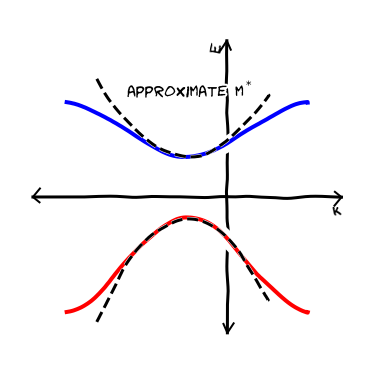

In [236]:
"""
XKCD plot generator
-------------------
Author: Jake Vanderplas

This is a script that will take any matplotlib line diagram, and convert it
to an XKCD-style plot.  It will work for plots with line & text elements,
including axes labels and titles (but not axes tick labels).

The idea for this comes from work by Damon McDougall
  http://www.mail-archive.com/matplotlib-users@lists.sourceforge.net/msg25499.html
"""
import numpy as np
import pylab as pl
from scipy import interpolate, signal
import matplotlib.font_manager as fm


# We need a special font for the code below.  It can be downloaded this way:
import os
import urllib.request as urllib2
if not os.path.exists('Humor-Sans.ttf'):
    fhandle = urllib2.urlopen('http://antiyawn.com/uploads/Humor-Sans-1.0.ttf')
    open('Humor-Sans.ttf', 'wb').write(fhandle.read())

    
def xkcd_line(x, y, xlim=None, ylim=None,
              mag=1.0, f1=30, f2=0.05, f3=15):
    """
    Mimic a hand-drawn line from (x, y) data

    Parameters
    ----------
    x, y : array_like
        arrays to be modified
    xlim, ylim : data range
        the assumed plot range for the modification.  If not specified,
        they will be guessed from the  data
    mag : float
        magnitude of distortions
    f1, f2, f3 : int, float, int
        filtering parameters.  f1 gives the size of the window, f2 gives
        the high-frequency cutoff, f3 gives the size of the filter
    
    Returns
    -------
    x, y : ndarrays
        The modified lines
    """
    x = np.asarray(x)
    y = np.asarray(y)
    
    # get limits for rescaling
    if xlim is None:
        xlim = (x.min(), x.max())
    if ylim is None:
        ylim = (y.min(), y.max())

    if xlim[1] == xlim[0]:
        xlim = ylim
        
    if ylim[1] == ylim[0]:
        ylim = xlim

    # scale the data
    x_scaled = (x - xlim[0]) * 1. / (xlim[1] - xlim[0])
    y_scaled = (y - ylim[0]) * 1. / (ylim[1] - ylim[0])

    # compute the total distance along the path
    dx = x_scaled[1:] - x_scaled[:-1]
    dy = y_scaled[1:] - y_scaled[:-1]
    dist_tot = np.sum(np.sqrt(dx * dx + dy * dy))

    # number of interpolated points is proportional to the distance
    Nu = int(200 * dist_tot)
    u = np.arange(-1, Nu + 1) * 1. / (Nu - 1)

    # interpolate curve at sampled points
    k = min(3, len(x) - 1)
    res = interpolate.splprep([x_scaled, y_scaled], s=0, k=k)
    x_int, y_int = interpolate.splev(u, res[0]) 

    # we'll perturb perpendicular to the drawn line
    dx = x_int[2:] - x_int[:-2]
    dy = y_int[2:] - y_int[:-2]
    dist = np.sqrt(dx * dx + dy * dy)

    # create a filtered perturbation
    coeffs = mag * np.random.normal(0, 0.01, len(x_int) - 2)
    b = signal.firwin(f1, f2 * dist_tot, window=('kaiser', f3))
    response = signal.lfilter(b, 1, coeffs)

    x_int[1:-1] += response * dy / dist
    y_int[1:-1] += response * dx / dist

    # un-scale data
    x_int = x_int[1:-1] * (xlim[1] - xlim[0]) + xlim[0]
    y_int = y_int[1:-1] * (ylim[1] - ylim[0]) + ylim[0]
    
    return x_int, y_int


def XKCDify(ax, mag=1.0,
            f1=50, f2=0.01, f3=15,
            bgcolor='w',
            xaxis_loc=None,
            yaxis_loc=None,
            xaxis_arrow='+',
            yaxis_arrow='+',
            ax_extend=0.1,
            expand_axes=False):
    """Make axis look hand-drawn

    This adjusts all lines, text, legends, and axes in the figure to look
    like xkcd plots.  Other plot elements are not modified.
    
    Parameters
    ----------
    ax : Axes instance
        the axes to be modified.
    mag : float
        the magnitude of the distortion
    f1, f2, f3 : int, float, int
        filtering parameters.  f1 gives the size of the window, f2 gives
        the high-frequency cutoff, f3 gives the size of the filter
    xaxis_loc, yaxis_log : float
        The locations to draw the x and y axes.  If not specified, they
        will be drawn from the bottom left of the plot
    xaxis_arrow, yaxis_arrow : str
        where to draw arrows on the x/y axes.  Options are '+', '-', '+-', or ''
    ax_extend : float
        How far (fractionally) to extend the drawn axes beyond the original
        axes limits
    expand_axes : bool
        if True, then expand axes to fill the figure (useful if there is only
        a single axes in the figure)
    """
    # Get axes aspect
    ext = ax.get_window_extent().extents
    aspect = (ext[3] - ext[1]) / (ext[2] - ext[0])

    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xspan = xlim[1] - xlim[0]
    yspan = ylim[1] - xlim[0]

    xax_lim = (xlim[0] - ax_extend * xspan,
               xlim[1] + ax_extend * xspan)
    yax_lim = (ylim[0] - ax_extend * yspan,
               ylim[1] + ax_extend * yspan)

    if xaxis_loc is None:
        xaxis_loc = ylim[0]

    if yaxis_loc is None:
        yaxis_loc = xlim[0]

    # Draw axes
    xaxis = pl.Line2D([xax_lim[0], xax_lim[1]], [xaxis_loc, xaxis_loc],
                      linestyle='-', color='k')
    yaxis = pl.Line2D([yaxis_loc, yaxis_loc], [yax_lim[0], yax_lim[1]],
                      linestyle='-', color='k')

    # Label axes3, 0.5, 'hello', fontsize=14)
    ax.text(xax_lim[1], xaxis_loc - 0.02 * yspan, ax.get_xlabel(),
            fontsize=14, ha='right', va='top', rotation=12)
    ax.text(yaxis_loc - 0.02 * xspan, yax_lim[1], ax.get_ylabel(),
            fontsize=14, ha='right', va='top', rotation=78)
    ax.set_xlabel('')
    ax.set_ylabel('')

    # Add title
    ax.text(0.5 * (xax_lim[1] + xax_lim[0]), yax_lim[1],
            ax.get_title(),
            ha='center', va='bottom', fontsize=16)
    ax.set_title('')

    Nlines = len(ax.lines)
    lines = [xaxis, yaxis] + [ax.lines.pop(0) for i in range(Nlines)]

    for line in lines:
        x, y = line.get_data()

        x_int, y_int = xkcd_line(x, y, xlim, ylim,
                                 mag, f1, f2, f3)

        # create foreground and background line
        lw = line.get_linewidth()
        line.set_linewidth(2 * lw)
        line.set_data(x_int, y_int)

        # don't add background line for axes
        if (line is not xaxis) and (line is not yaxis) and (line.get_label() != "no-bg"):
            line_bg = pl.Line2D(x_int, y_int, color=bgcolor, linewidth=8 * lw)

            ax.add_line(line_bg)
        ax.add_line(line)

    # Draw arrow-heads at the end of axes lines
    arr1 = 0.03 * np.array([-1, 0, -1])
    arr2 = 0.02 * np.array([-1, 0, 1])

    arr1[::2] += np.random.normal(0, 0.005, 2)
    arr2[::2] += np.random.normal(0, 0.005, 2)

    x, y = xaxis.get_data()
    if '+' in str(xaxis_arrow):
        ax.plot(x[-1] + arr1 * xspan * aspect,
                y[-1] + arr2 * yspan,
                color='k', lw=2)
    if '-' in str(xaxis_arrow):
        ax.plot(x[0] - arr1 * xspan * aspect,
                y[0] - arr2 * yspan,
                color='k', lw=2)

    x, y = yaxis.get_data()
    if '+' in str(yaxis_arrow):
        ax.plot(x[-1] + arr2 * xspan * aspect,
                y[-1] + arr1 * yspan,
                color='k', lw=2)
    if '-' in str(yaxis_arrow):
        ax.plot(x[0] - arr2 * xspan * aspect,
                y[0] - arr1 * yspan,
                color='k', lw=2)

    # Change all the fonts to humor-sans.
    prop = fm.FontProperties(fname='Humor-Sans.ttf', size=16)
    for text in ax.texts:
        text.set_fontproperties(prop)
    
    # modify legend
    leg = ax.get_legend()
    if leg is not None:
        leg.set_frame_on(False)
        
        for child in leg.get_children():
            if isinstance(child, pl.Line2D):
                x, y = child.get_data()
                child.set_data(xkcd_line(x, y, mag=10, f1=100, f2=0.001))
                child.set_linewidth(2 * child.get_linewidth())
            if isinstance(child, pl.Text):
                child.set_fontproperties(prop)
    
    # Set the axis limits
    ax.set_xlim(xax_lim[0] - 0.1 * xspan,
                xax_lim[1] + 0.1 * xspan)
    ax.set_ylim(yax_lim[0] - 0.1 * yspan,
                yax_lim[1] + 0.1 * yspan)

    # adjust the axes
    ax.set_xticks([])
    ax.set_yticks([])      

    if expand_axes:
        ax.figure.set_facecolor(bgcolor)
        ax.set_axis_off()
        ax.set_position([0, 0, 1, 1])
    
    return ax

#%% effective_mass_model_sketch

import matplotlib.pyplot as plt

with plt.xkcd():
    fig, ax = plt.subplots(figsize=(5,5))

    k = np.linspace(-3, 3, 400)
    E_c = 1 - 0.4 * np.cos(k)  # Conduction band (approximate shape)
    E_v = -1 + 0.7 * np.cos(k)  # Valence band

    ax.plot(k, E_c, label="Conduction band", color='blue')
    ax.plot(k, E_v, label="Valence band", color='red')

    # Add effective mass parabola near band edges
    k_zoom = np.linspace(-2.25, 2, 200)
    m_eff_c = -0.32 - 0.3 * k_zoom**2
    m_eff_v = 0.6 + 0.225 * k_zoom**2
    ax.plot(k_zoom, m_eff_c, 'k--', lw=1.5, label="no-bg")
    ax.plot(k_zoom, m_eff_v, 'k--', lw=1.5, label="no-bg")

    ax.set_xlabel(r"k", fontsize=14)
    ax.set_ylabel(r"E", fontsize=14)

    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines[['top', 'right']].set_visible(False)

    ax.set_xlim(-3.2, 3.2)
    ax.set_ylim(-1.5, 1.8)

    plt.text(-1.5,1.5,r'approximate m$^*$')

XKCDify(ax, xaxis_loc=0.0, yaxis_loc=1.0,
        xaxis_arrow='+-', yaxis_arrow='+-',
        expand_axes=True)

plt.savefig('effective_mass_model_sketch.pdf', dpi=300, bbox_inches="tight")


In the Boltzmann transport theory framework with the relaxation time approximation, the thermopower is expressed as:

$$
\alpha = \pm \frac{k_{\mathrm{B}}}{e} \left[
\frac{\int_0^{\infty} \varepsilon^{5/2} \tau(\varepsilon) \frac{\partial f(\varepsilon)}{\partial \varepsilon} \, d\varepsilon}
{\int_0^{\infty} \varepsilon^{3/2} \tau(\varepsilon) \frac{\partial f(\varepsilon)}{\partial \varepsilon} \, d\varepsilon}
- \eta \right].
$$

Using Eqs. for $\tau(\varepsilon)$, the Fermi-Dirac distribution $f(\varepsilon)$, and the Fermi integral, this expression can be simplified to:

$$
\alpha(\eta) = \pm \frac{k_{\mathrm{B}}}{e} \left(
\frac{(r + \tfrac{5}{2}) F_{r + \tfrac{3}{2}}(\eta)}{(r + \tfrac{3}{2}) F_{r + \tfrac{1}{2}}(\eta)} - \eta
\right).
$$

> **Note:** This formula assumes the chemical potential does not depend on temperature, i.e., $\eta \approx E_{\mathrm{F}} / k_{\mathrm{B}}T$. This approximation may not be valid in some cases, especially for $\alpha(T)$ modelling. For a more detailed overview of the influence of the temperature dependent chemical potential on thermopower we refer the reader to the following paper by [Takeuchi et al.](https://www.jstage.jst.go.jp/article/matertrans/51/3/51_M2009349/_article)

The electrical conductivity, in turn, is expressed as

$$
\sigma = \frac{8\pi e^2 \left ( 2m_{d}^{\ast} k_{\text{B}} T \right )^{3/2}}{3m_{d}^{\ast}h^{3}}\int_{0}^{\infty} \varepsilon^{{3}/{2}} \tau(\varepsilon) \frac{\partial f(\varepsilon)}{\partial \varepsilon} d\varepsilon,
$$

and can be simplified to 

$$
\sigma \left ( \eta  \right ) = \frac{8\pi e\left ( 2m_{d}^{\ast} k_{\text{B}} T \right )^{3/2}}{3h^{3}}\mu_{0}\left ( r + \frac{3}{2} \right ) F_{r+{1}/{2}}\left ( \eta  \right ),
$$
with $e$ representing the electron charge and $\mu_0 = e \tau_{0} N_V / m_{b}^{\ast}$ representing the intrinsic carrier mobility (where $m_{b}^{\ast}$​ is the effective band mass, and $N_V$​ is the valley degeneracy). Instead of $\mu_0$ and $m_{d}^{\ast}$ it is more convenient to express $\sigma \left ( \eta  \right ) $ via the [weighted mobility](https://doi.org/10.1002/adma.202001537) $\mu_{w} = \mu_{0}\left ( m_{d}^{\ast}/m_{e} \right )^{3/2}$:

$$
\sigma \left ( \eta  \right ) = \frac{8\pi e\left ( 2m_{e} k_{\text{B}} T \right )^{3/2}}{3h^{3}}\mu_{w}\left ( r + \frac{3}{2} \right ) F_{r+{1}/{2}}\left ( \eta  \right ).
$$

The weighted mobility $\mu_{w}$, in turn, is [easy to calculate from experimentally measured thermopower $\alpha$ and electrical conductivity $\sigma$](https://doi.org/10.1002/adma.202001537). It can also be considered as a descriptor for thermoelectric performance implemented in the so-called [quality factor](https://doi.org/10.1126/sciadv.abc0726) $\beta \propto \mu_{w}/\kappa_{lat}$ ($\kappa_{lat}$ is the lattice (phonon) thermal conductivity).

Other transport coefficients, such as Lorenz number $L$ and Hall factor $r_{\text{H}}$ are expressed as a functions of only $\eta$:

$$
    L\left(\eta\right)=\left(\frac{k_B}{e}\right)^2\left(\frac{\left(r+{7}/{2}\right)F_{r+{5}/{2}}\left(\eta\right)}{\left(r+{3}/{2}\right)F_{r+{1}/{2}}\left(\eta\right)}-\left[\frac{\left(r+{5}/{2}\right)F_{r+{3}/{2}}\left(\eta\right)}{\left(r+{3}/{2}\right)F_{r+{1}/{2}}\left(\eta\right)}\right]^2\right),
$$
$$
    r_{\text{H}} = \frac{3}{2}F_{{1}/{2}} \left( \eta \right)\frac{\left( 2r+{3}/{2} \right) F_{2r+{1}/{2}} \left( \eta \right)}{\left( r+{3}/{2} \right)^2 F_{r+{1}/{2}}^2\left(\eta\right)}.
$$

Thus, the thermoelectric performance $zT$ can be expressed as a function of the intrinsic property $\beta$, and an extrinsic factor $\eta$:

$$
zT = \frac{\alpha^2 \sigma}{\kappa_e + \kappa_{lat}}T = \frac{\alpha^2 \sigma}{\sigma LT + \kappa_{lat}}T = \frac{\alpha^2(\eta)}{L(\eta) + \frac{\kappa_{lat}}{\sigma(\eta)T}} = \frac{\alpha^2(\eta)}{L(\eta) + \frac{\left ( {k_{\mathrm{B}}}/{e} \right )^2}{\beta (r +3/2) F_{r+{1}/{2}}\left ( \eta  \right )}},
$$
with
$$
\beta = \left(\frac{k_B}{e}\right)^2 \frac{8\pi e\left ( 2m_{e} k_{\text{B}} \right )^{3/2}}{3h^{3}}\frac{\mu_{w}}{\kappa_{lat}} T^{5/2}
$$

### Computation

Computation and plotting requires several modules, including `numpy`, `scipy`, `matplotlib` and [`fdint`](https://pypi.org/project/fdint/) for The Fermi-Dirac integral calculation. For experimental data extraction `pandas` will be used.

In [237]:
import scipy.constants as sc #fundamental constants (in SI units)
import matplotlib.pyplot as plt #for plotting
import matplotlib.gridspec as gridspec #for plotting
import numpy as np
!pip install fdint 
from fdint import fdk #Fermi integral calculation
Fermi = fdk
import pandas as pd

Defaulting to user installation because normal site-packages is not writeable


#### Transport Properties for a Single Band

> **Note:** $\eta$ ​is referenced to the band edge; in other words, $\eta = 0$ at the band edge, $\eta > 0$ when the chemical potential is in the band, and $\eta < 0$ when the chemical potential is in the band gap. This description holds regardless of whether the majority carriers are electrons (conduction band) or holes (valence band).
For the two limiting cases of a degenerate ($\eta \geq 5$) and a non-degenerate ($\eta \leq -1$) semiconductors, the Fermi integrals can be solved analytically, providing relatively simple expressions for the transport coefficients. For details see [this paper](https://doi.org/10.48550/arXiv.2502.03837).

The transport properties ($\alpha$, $\sigma$, $L$, etc.) within a single-band approximation can be codified as follows:

In [238]:
def a_SPB(eta,r=-0.5,chargeSign=1.0):
    '''
    Calculates thermopower [mkV/K], assuming tau~x**r
    r - scattering parameter (e.g. r=-0.5 for acoustic, r=1.5 for ionized impurity scattering)
    eta - chemical potential
    chargeSign - optional sign of carrier charge
    '''
    alpha = chargeSign*sc.k/sc.e*(((r+2.5)*Fermi(r+1.5,eta))/((r+1.5)*Fermi(r+0.5,eta))-eta)*10**6
    return alpha

def n(eta,r,T,md):
    '''
    Calculates charge carrier concentration [cm-3], assuming tau~x**r (effective mass model)
    r - scattering parameter (e.g. r=-0.5 for acoustic, r=1.5 for ionized impurity scattering)
    eta - chemical potential
    '''
    n = 4*sc.pi*(2*md*sc.m_e*sc.k*T/sc.h**2)**(3/2)*Fermi(1/2,eta)*10**(-6)
    return n

def Lorenz_SPB(eta,r=-0.5):
    '''
    Calculates Lorenz number [V^2/K^2], assuming tau~x**r
    r - scattering parameter (e.g. r=-0.5 for acoustic, r=1.5 for ionized impurity scattering)
    eta - chemical potential
    '''
    L = (sc.k/sc.e)**2*(((r+7/2)*Fermi(r+5/2,eta))/((r+3/2)*Fermi(r+1/2,eta))-(((r+5/2)*Fermi(r+3/2,eta))/((r+3/2)*Fermi(r+1/2,eta)))**2)*1e8
    return L

def rH_SPB(eta,r=-0.5):
    '''
    Calculates Hall factor, assuming tau~x**r
    r - scattering parameter (e.g. r=-0.5 for acoustic, r=1.5 for ionized impurity scattering)
    eta - chemical potential
    '''
    rH = 3/2*Fermi(1/2,eta)*(2*r+3/2)*Fermi(2*r+1/2,eta)/(r+3/2)**2/(Fermi(r+1/2,eta))**2
    return rH

def sigma_SPB(eta,mu_w,r=-0.5,T=300):
    '''
    Calculates electrical conductivity [1/Ohm/cm], assuming tau~x**r
    r - scattering parameter (e.g. r=-0.5 for acoustic, r=1.5 for ionized impurity scattering)
    eta - chemical potential
    mu_w - weighted mobility
    '''
    s = 8*sc.pi*sc.e*(2*sc.m_e*sc.k*T)**(3/2)*mu_w*(r+3/2)*Fermi(r+1/2,eta)/(3*sc.h**3)*1e-6
    return s

def PF_SPB(eta,mu_w,r=-0.5,T=300):
    '''
    Calculates power factor [mkW/cm/K^2], assuming tau~x**r
    r - scattering parameter (e.g. r=-0.5 for acoustic, r=1.5 for ionized impurity scattering)
    eta - chemical potential
    mu_w - weighted mobility
    '''
    PF = a_SPB(eta,r=r)**2*sigma_SPB(eta,mu_w=mu_w,r=r,T=T)*1e-6
    return PF

def kappa_e(eta,mu_w,r=-0.5,T=300):
    '''
    Calculates electronic thermal conductivity [W/m/K], assuming tau~x**r
    r - scattering parameter (e.g. r=-0.5 for acoustic, r=1.5 for ionized impurity scattering)
    eta - chemical potential
    mu_w - weighted mobility
    '''
    k_e = sigma_SPB(eta,mu_w=mu_w,r=r,T=T)*Lorenz_SPB(eta,r=r)*T*1e-6
    return k_e

def zT_SPB(eta,mu_w,kappa_l,r=-0.5,T=300):
    '''
    Calculates zT, assuming tau~x**r
    r - scattering parameter (e.g. r=-0.5 for acoustic, r=1.5 for ionized impurity scattering)
    eta - chemical potential
    mu_w - weighted mobility
    '''
    zT = a_SPB(eta,r=r)**2*sigma_SPB(eta,mu_w=mu_w,r=r,T=T)*1e-6/(kappa_l+kappa_e(eta,mu_w,r=r,T=T))*T*1e-3
    return zT

For degenerate and non-degenerate regions, the transport properties can be represented as follows:

In [239]:
def a_SPB_nondeg(eta,r=-0.5,chargeSign=1.0):
    '''
    Calculates thermopower [mkV/K] for nondegenerate region, assuming tau~x**r and Boltzmann statistics
    r - scattering parameter (e.g. r=-0.5 for acoustic, r=1.5 for ionized impurity scattering)
    eta - chemical potential
    chargeSign - optional sign of carrier charge
    '''
    alpha = chargeSign*sc.k/sc.e*(r+5/2-eta)*10**6
    return alpha

def a_SPB_deg(eta,r=-0.5,chargeSign=1.0):
    '''
    Calculates thermopower [mkV/K] for degenerate region, assuming tau~x**r and Fermi-Dirac statistics
    r - scattering parameter (e.g. r=-0.5 for acoustic, r=1.5 for ionized impurity scattering)
    eta - chemical potential
    chargeSign - optional sign of carrier charge
    '''
    alpha = chargeSign*sc.k/sc.e*sc.pi**2/3*(3/2+r)/eta*10**6
    return alpha

def n_deg(eta,r,T,md):
    '''
    Calculates charge carrier concentration [cm-3] in degenerate limit
    r - scattering parameter (e.g. r=-0.5 for acoustic, r=1.5 for ionized impurity scattering)
    eta - chemical potential
    '''
    n = 8*sc.pi/3*(2*md*sc.m_e*sc.k*T/sc.h**2)**(3/2)*eta**(3/2)*10**(-6)
    return n

def n_nondeg(eta,r,T,md):
    '''
    Calculates charge carrier concentration [cm-3] in non-degenerate limit
    r - scattering parameter (e.g. r=-0.5 for acoustic, r=1.5 for ionized impurity scattering)
    eta - chemical potential
    '''
    n = 2*(2*sc.pi*md*sc.m_e*sc.k*T/sc.h**2)**(3/2)*np.exp(eta)*10**(-6)
    return n

def L_nondeg(r):
    '''
    Calculates Lorenz number [V^2/K^2] in non-degenerate limit
    r - scattering parameter (e.g. r=-0.5 for acoustic, r=1.5 for ionized impurity scattering)
    '''
    L = (sc.k/sc.e)**2*(r+5/2)*10**8
    return L

L_deg = (sc.k/sc.e)**2*sc.pi**2/3*10**8 #Lorenz number [V^2/K^2] in degenerate limit

from scipy.special import gamma

def rH_nondeg(r):
    '''
    Calculates Hall factor in non-degenerate limit
    r - scattering parameter (e.g. r=-0.5 for acoustic, r=1.5 for ionized impurity scattering)
    '''
    rH = gamma(5/2)*gamma(2*r+5/2)/(gamma(r+5/2))**2
    return rH

rH_deg = 1 #Hall factor in degenerate limit

def sigma_SPB_nondeg(eta,mu_w,r=-0.5,T=300):
    '''
    Calculates electrical conductivity [1/Ohm/cm] in non-degenerate limit
    r - scattering parameter (e.g. r=-0.5 for acoustic, r=1.5 for ionized impurity scattering)
    eta - chemical potential
    mu_w - weighted mobility
    '''
    s = 8*sc.pi*sc.e*(2*sc.m_e*sc.k*T)**(3/2)*mu_w*(r+3/2)*gamma(r+3/2)*np.exp(eta)/(3*sc.h**3)*1e-6
    return s

def sigma_SPB_deg(eta,mu_w,r=-0.5,T=300):
    '''
    Calculates electrical conductivity [1/Ohm/cm] in degenerate limit
    r - scattering parameter (e.g. r=-0.5 for acoustic, r=1.5 for ionized impurity scattering)
    eta - chemical potential
    mu_w - weighted mobility
    '''
    s = 8*sc.pi*sc.e*(2*sc.m_e*sc.k*T)**(3/2)*mu_w*(r+3/2)*eta**(r+3/2)/(3*sc.h**3)*1e-6
    return s

def PF_SPB_nondeg(eta,mu_w,r=-0.5,T=300):
    '''
    Calculates power factor [mkW/cm/K^2] in non-degenerate limit
    r - scattering parameter (e.g. r=-0.5 for acoustic, r=1.5 for ionized impurity scattering)
    eta - chemical potential
    mu_w - weighted mobility
    '''
    PF = a_SPB_nondeg(eta,r)**2*sigma_SPB_nondeg(eta,mu_w,r,T)*1e-6
    return PF

def PF_SPB_deg(eta,mu_w,r=-0.5,T=300):
    '''
    Calculates power factor [mkW/cm/K^2] in degenerate limit
    r - scattering parameter (e.g. r=-0.5 for acoustic, r=1.5 for ionized impurity scattering)
    eta - chemical potential
    mu_w - weighted mobility
    '''
    PF = a_SPB_deg(eta,r)**2*sigma_SPB_deg(eta,mu_w,r,T)*1e-6
    return PF

def kappa_e_nondeg(eta,mu_w,r=-0.5,T=300):
    '''
    Calculates electronic thermal conductivity [W/m/K], assuming tau~x**r
    r - scattering parameter (e.g. r=-0.5 for acoustic, r=1.5 for ionized impurity scattering)
    eta - chemical potential
    mu_w - weighted mobility
    '''
    k_e = sigma_SPB_nondeg(eta,mu_w=mu_w,r=r,T=T)*L_nondeg(r=r)*T*1e-6
    return k_e

def zT_SPB_nondeg(eta,mu_w,kappa_l,r=-0.5,T=300):
    '''
    Calculates zT, assuming tau~x**r
    r - scattering parameter (e.g. r=-0.5 for acoustic, r=1.5 for ionized impurity scattering)
    eta - chemical potential
    mu_w - weighted mobility
    '''
    zT = a_SPB_nondeg(eta,r=r)**2*sigma_SPB_nondeg(eta,mu_w=mu_w,r=r,T=T)*1e-6/(kappa_l+kappa_e_nondeg(eta,mu_w,r=r,T=T))*T*1e-3
    return zT

def kappa_e_deg(eta,mu_w,r=-0.5,T=300):
    '''
    Calculates electronic thermal conductivity [W/m/K], assuming tau~x**r
    r - scattering parameter (e.g. r=-0.5 for acoustic, r=1.5 for ionized impurity scattering)
    eta - chemical potential
    mu_w - weighted mobility
    '''
    k_e = sigma_SPB_deg(eta,mu_w=mu_w,r=r,T=T)*L_deg*T*1e-6
    return k_e

def zT_SPB_deg(eta,mu_w,kappa_l,r=-0.5,T=300):
    '''
    Calculates zT, assuming tau~x**r
    r - scattering parameter (e.g. r=-0.5 for acoustic, r=1.5 for ionized impurity scattering)
    eta - chemical potential
    mu_w - weighted mobility
    '''
    zT = a_SPB_deg(eta,r=r)**2*sigma_SPB_deg(eta,mu_w=mu_w,r=r,T=T)*1e-6/(kappa_l+kappa_e_deg(eta,mu_w,r=r,T=T))*T*1e-3
    return zT

For example, if we set the following parameters for our model system:

In [240]:
eta = np.linspace(-20,20,1000) #Chemical potential range
r = -1/2 # Scattering parameter (assumes acoustic phonon scattering)
md = 1 # Effective mass (m_e)
mu_w = 1 # Weighted mobility (cm^2/V/s)
T = 300 # Temperature (K)
kappa_l = 1 # Lattice thermal conductivity (W/mK)

Text(5.769804926190367e+20, 717.5, 'degenerate')

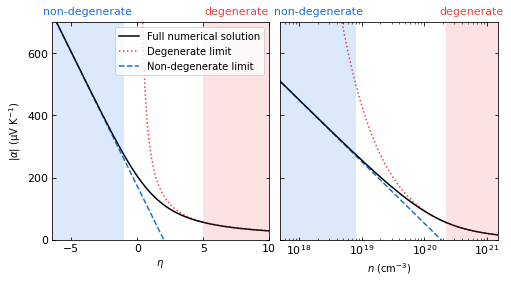

In [241]:
fig = plt.figure(1, figsize=(8,4))
gs = gridspec.GridSpec(1,2)
gs.update(wspace=0.05, hspace=0.25)

xtr_subsplot= fig.add_subplot(gs[0:1,0:1])
plt.plot(eta, a_SPB(eta,r=r), linestyle='-', color='k', label=r'Full numerical solution', zorder=1)
eta_deg = np.linspace(0.01,20,500)
plt.plot(eta_deg, a_SPB_deg(eta_deg,r=r), linestyle=':', color='#f14040', label = r'Degenerate limit', zorder=0) #degenerate SPB curve
plt.plot(eta, a_SPB_nondeg(eta,r=r), linestyle='--', color='#1a6fdf', label =r'Non-degenerate limit', zorder=0) #nondegenerate SPB curve
x_min = -6.5
x_max = 10
y_min = 0
y_max = 700

plt.xlim([x_min,x_max])
plt.ylim([y_min,y_max])

plt.tick_params(direction='in',which='major', length=3.5, bottom=True, top=True, left=True, right=True)
yticks = np.arange(0,y_max+1,200)
plt.yticks(yticks)
xticks = np.arange(-5,x_max+0.1,5)
plt.xticks(xticks)
plt.tick_params(labelbottom=True, labeltop=False, labelright=False, labelleft=True, labelsize=11)
plt.ylabel(r'$|\alpha|$ ($\mathrm{\mu}$V K$^{-1}$)')
plt.xlabel(r'$\eta$')
plt.legend()

plt.axvspan(x_min,-1, color='#1a6fdf', alpha=0.15, lw=0)
plt.axvspan(5,x_max, color='#f14040', alpha=0.15, lw=0)
plt.text((x_min+1)/2-1, y_max+y_max*0.025, 'non-degenerate', ha='center', va='bottom', zorder=5, fontsize=11, color='#1a6fdf')
plt.text((x_max-5)/2+5, y_max+y_max*0.025, 'degenerate', ha='center', va='bottom', zorder=5, fontsize=11, color='#f14040')

xtr_subsplot= fig.add_subplot(gs[0:1,1:2])
xtr_subsplot.set_xscale('log')

plt.plot(n(eta,T=T, md=md, r=r), a_SPB(eta,r=r), linestyle='-', color='k', label=r'Full numerical solution', zorder=1)
eta_deg = np.linspace(0.01,20,500)
plt.plot(n_deg(eta_deg,r=r,T=T,md=md), a_SPB_deg(eta_deg,r=r), linestyle=':', color='#f14040', label = r'Degenerate limit', zorder=0) #degenerate SPB curve
plt.plot(n_nondeg(eta,r=r,T=T,md=md), a_SPB_nondeg(eta,r=r), linestyle='--', color='#1a6fdf', label =r'Non-degenerate limit', zorder=0) #nondegenerate SPB curve

x_min = 5e17
x_max = 1.5e21

plt.xlim([x_min,x_max])
plt.ylim([y_min,y_max])

plt.tick_params(direction='in',which='major', length=3.5, bottom=True, top=True, left=True, right=True)
plt.tick_params(direction='in',which='minor', bottom=True, top=True, left=False, right=False)
yticks = np.arange(0,y_max+1,200)
plt.yticks(yticks)
plt.tick_params(labelbottom=True, labeltop=False, labelright=False, labelleft=False, labelsize=11)
plt.xlabel(r'$n$ (cm$^{-3}$)')

plt.axvspan(x_min,n(-1,T=T, md=md, r=r), color='#1a6fdf', alpha=0.15, lw=0)
plt.axvspan(n(5,T=T, md=md, r=r),x_max, color='#f14040', alpha=0.15, lw=0)
plt.text(np.sqrt(x_min*n(-1,T=T, md=md, r=r)), y_max+y_max*0.025, 'non-degenerate', ha='center', va='bottom', zorder=5, fontsize=11, color='#1a6fdf')
plt.text(np.sqrt(n(5,T=T, md=md, r=r)*x_max), y_max+y_max*0.025, 'degenerate', ha='center', va='bottom', zorder=5, fontsize=11, color='#f14040')

#print("Thermopower α as a function of (left) chemical potential η and (right) carrier concentration n calculated through numerical solution (black solid curve), 
# the degenerate limit (red dotted curve), and the non-degenerate limit (blue dashed curve).")

Text(7.5, 1.025e+21, 'degenerate')

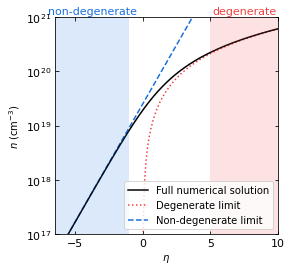

In [242]:
fig = plt.figure(1, figsize=(4,4))
gs = gridspec.GridSpec(1,1)
gs.update(wspace=0.05, hspace=0.25)

xtr_subsplot= fig.add_subplot(gs[0:1,0:1])
xtr_subsplot.set_yscale('log')

plt.plot(eta, n(eta,T=T, md=md, r=r), linestyle='-', color='k', label=r'Full numerical solution', zorder=1)
eta_deg = np.linspace(0.01,20,500)
plt.plot(eta_deg, n_deg(eta_deg,r=r,T=T,md=md), linestyle=':', color='#f14040', label = r'Degenerate limit', zorder=0) #degenerate SPB curve
plt.plot(eta, n_nondeg(eta,r=r,T=T,md=md), linestyle='--', color='#1a6fdf', label =r'Non-degenerate limit', zorder=0) #nondegenerate SPB curve
x_min = -6.5
x_max = 10
y_min = 1e17
y_max = 1e21

plt.xlim([x_min,x_max])
plt.ylim([y_min,y_max])

plt.tick_params(direction='in',which='major', length=3.5, bottom=True, top=True, left=True, right=True)
plt.tick_params(direction='in',which='minor', bottom=True, top=True, left=False, right=False)
xticks = np.arange(-5,x_max+0.1,5)
plt.xticks(xticks)
plt.tick_params(labelbottom=True, labeltop=False, labelright=False, labelleft=True, labelsize=11)
plt.ylabel(r'$n$ (cm$^{-3}$)')
plt.xlabel(r'$\eta$')
plt.legend()

plt.axvspan(x_min,-1, color='#1a6fdf', alpha=0.15, lw=0)
plt.axvspan(5,x_max, color='#f14040', alpha=0.15, lw=0)
plt.text((x_min+1)/2-1, y_max+y_max*0.025, 'non-degenerate', ha='center', va='bottom', zorder=5, fontsize=11, color='#1a6fdf')
plt.text((x_max-5)/2+5, y_max+y_max*0.025, 'degenerate', ha='center', va='bottom', zorder=5, fontsize=11, color='#f14040')

#print("Carrier concentration n as a function of chemical potential η calculated through numerical solution (black solid curve), 
# the degenerate limit (red dotted curve), and the non-degenerate limit (blue dashed curve).")

Text(5.769804926190367e+20, 35.875, 'degenerate')

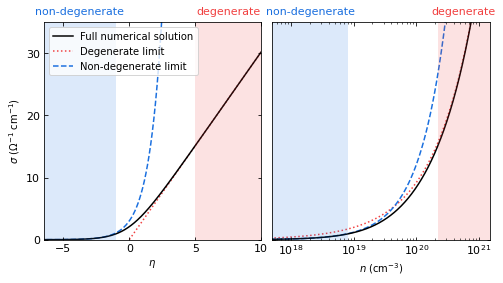

In [243]:
fig = plt.figure(1, figsize=(8,4))
gs = gridspec.GridSpec(1,2)
gs.update(wspace=0.05, hspace=0.25)

xtr_subsplot= fig.add_subplot(gs[0:1,0:1])
plt.plot(eta, sigma_SPB(eta,mu_w=1,r=r,T=T), linestyle='-', color='k', label=r'Full numerical solution', zorder=1)
eta_deg = np.linspace(0.01,20,500)
plt.plot(eta_deg, sigma_SPB_deg(eta_deg,mu_w,r=r,T=T), linestyle=':', color='#f14040', label = r'Degenerate limit', zorder=0) #degenerate SPB curve
plt.plot(eta, sigma_SPB_nondeg(eta,mu_w,r=r,T=T), linestyle='--', color='#1a6fdf', label =r'Non-degenerate limit', zorder=0) #nondegenerate SPB curve
x_min = -6.5
x_max = 10
y_min = 0
y_max = 35

plt.xlim([x_min,x_max])
plt.ylim([y_min,y_max])

plt.tick_params(direction='in',which='major', length=3.5, bottom=True, top=True, left=True, right=True)
yticks = np.arange(0,y_max+1,10)
plt.yticks(yticks)
xticks = np.arange(-5,x_max+0.1,5)
plt.xticks(xticks)
plt.tick_params(labelbottom=True, labeltop=False, labelright=False, labelleft=True, labelsize=11)
plt.ylabel(r'$\sigma$ ($\Omega^{-1}$ cm$^{-1}$)')
plt.xlabel(r'$\eta$')
plt.legend()

plt.axvspan(x_min,-1, color='#1a6fdf', alpha=0.15, lw=0)
plt.axvspan(5,x_max, color='#f14040', alpha=0.15, lw=0)
plt.text((x_min+1)/2-1, y_max+y_max*0.025, 'non-degenerate', ha='center', va='bottom', zorder=5, fontsize=11, color='#1a6fdf')
plt.text((x_max-5)/2+5, y_max+y_max*0.025, 'degenerate', ha='center', va='bottom', zorder=5, fontsize=11, color='#f14040')

xtr_subsplot= fig.add_subplot(gs[0:1,1:2])
xtr_subsplot.set_xscale('log')

plt.plot(n(eta,T=T, md=md, r=r), sigma_SPB(eta,mu_w=1,r=r,T=T), linestyle='-', color='k', label=r'Full numerical solution', zorder=1)
eta_deg = np.linspace(0.01,20,500)
plt.plot(n_deg(eta_deg,r=r,T=T,md=md), sigma_SPB_deg(eta_deg,mu_w,r=r,T=T), linestyle=':', color='#f14040', label = r'Degenerate limit', zorder=0) #degenerate SPB curve
plt.plot(n_nondeg(eta,r=r,T=T,md=md), sigma_SPB_nondeg(eta,mu_w,r=r,T=T), linestyle='--', color='#1a6fdf', label =r'Non-degenerate limit', zorder=0) #nondegenerate SPB curve

x_min = 5e17
x_max = 1.5e21

plt.xlim([x_min,x_max])
plt.ylim([y_min,y_max])

plt.tick_params(direction='in',which='major', length=3.5, bottom=True, top=True, left=True, right=True)
plt.tick_params(direction='in',which='minor', bottom=True, top=True, left=False, right=False)
yticks = np.arange(0,y_max+1,200)
plt.yticks(yticks)
plt.tick_params(labelbottom=True, labeltop=False, labelright=False, labelleft=False, labelsize=11)
plt.xlabel(r'$n$ (cm$^{-3}$)')

plt.axvspan(x_min,n(-1,T=T, md=md, r=r), color='#1a6fdf', alpha=0.15, lw=0)
plt.axvspan(n(5,T=T, md=md, r=r),x_max, color='#f14040', alpha=0.15, lw=0)
plt.text(np.sqrt(x_min*n(-1,T=T, md=md, r=r)), y_max+y_max*0.025, 'non-degenerate', ha='center', va='bottom', zorder=5, fontsize=11, color='#1a6fdf')
plt.text(np.sqrt(n(5,T=T, md=md, r=r)*x_max), y_max+y_max*0.025, 'degenerate', ha='center', va='bottom', zorder=5, fontsize=11, color='#f14040')

#print("Electrical conductivity σ as a function of (left) chemical potential η and (right) carrier concentration n calculated through numerical solution (black solid curve), 
# the degenerate limit (red dotted curve), and the non-degenerate limit (blue dashed curve).")

Text(5.769804926190367e+20, 2.71625, 'degenerate')

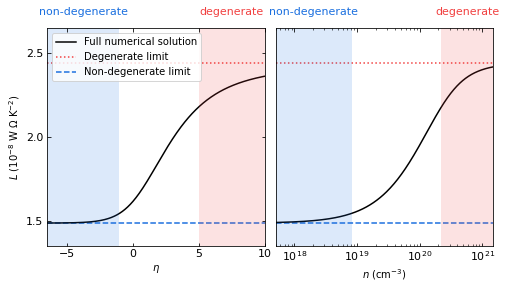

In [244]:
fig = plt.figure(1, figsize=(8,4))
gs = gridspec.GridSpec(1,2)
gs.update(wspace=0.05, hspace=0.25)

xtr_subsplot= fig.add_subplot(gs[0:1,0:1])
plt.plot(eta, Lorenz_SPB(eta,r=r), linestyle='-', color='k', label=r'Full numerical solution', zorder=1)
plt.axhline(L_deg, linestyle=':', color='#f14040', label = r'Degenerate limit', zorder=0) #degenerate SPB curve
plt.axhline(L_nondeg(r=r), linestyle='--', color='#1a6fdf', label =r'Non-degenerate limit', zorder=0) #nondegenerate SPB curve
x_min = -6.5
x_max = 10
y_min = 1.35
y_max = 2.65

plt.xlim([x_min,x_max])
plt.ylim([y_min,y_max])

plt.tick_params(direction='in',which='major', length=3.5, bottom=True, top=True, left=True, right=True)
yticks = np.arange(1.5,y_max+0.001,0.5)
plt.yticks(yticks)
xticks = np.arange(-5,x_max+0.1,5)
plt.xticks(xticks)
plt.tick_params(labelbottom=True, labeltop=False, labelright=False, labelleft=True, labelsize=11)
plt.ylabel(r'$L$ (10$^{-8}$ W $\Omega$ K$^{-2}$)')
plt.xlabel(r'$\eta$')
plt.legend()

plt.axvspan(x_min,-1, color='#1a6fdf', alpha=0.15, lw=0)
plt.axvspan(5,x_max, color='#f14040', alpha=0.15, lw=0)
plt.text((x_min+1)/2-1, y_max+y_max*0.025, 'non-degenerate', ha='center', va='bottom', zorder=5, fontsize=11, color='#1a6fdf')
plt.text((x_max-5)/2+5, y_max+y_max*0.025, 'degenerate', ha='center', va='bottom', zorder=5, fontsize=11, color='#f14040')

xtr_subsplot= fig.add_subplot(gs[0:1,1:2])
xtr_subsplot.set_xscale('log')

plt.plot(n(eta,T=T, md=md, r=r), Lorenz_SPB(eta,r=r), linestyle='-', color='k', label=r'Full numerical solution', zorder=1)
plt.axhline(L_deg, linestyle=':', color='#f14040', label = r'Degenerate limit', zorder=0) #degenerate SPB curve
plt.axhline(L_nondeg(r=r), linestyle='--', color='#1a6fdf', label =r'Non-degenerate limit', zorder=0) #nondegenerate SPB curve

x_min = 5e17
x_max = 1.5e21

plt.xlim([x_min,x_max])
plt.ylim([y_min,y_max])

plt.tick_params(direction='in',which='major', length=3.5, bottom=True, top=True, left=True, right=True)
plt.tick_params(direction='in',which='minor', bottom=True, top=True, left=False, right=False)
yticks = np.arange(0,y_max+1,200)
plt.yticks(yticks)
plt.tick_params(labelbottom=True, labeltop=False, labelright=False, labelleft=False, labelsize=11)
plt.xlabel(r'$n$ (cm$^{-3}$)')

plt.axvspan(x_min,n(-1,T=T, md=md, r=r), color='#1a6fdf', alpha=0.15, lw=0)
plt.axvspan(n(5,T=T, md=md, r=r),x_max, color='#f14040', alpha=0.15, lw=0)
plt.text(np.sqrt(x_min*n(-1,T=T, md=md, r=r)), y_max+y_max*0.025, 'non-degenerate', ha='center', va='bottom', zorder=5, fontsize=11, color='#1a6fdf')
plt.text(np.sqrt(n(5,T=T, md=md, r=r)*x_max), y_max+y_max*0.025, 'degenerate', ha='center', va='bottom', zorder=5, fontsize=11, color='#f14040')

#print("Lorenz number L as a function of (left) chemical potential η and (right) carrier concentration n calculated through numerical solution (black solid curve), 
# the degenerate limit (red dotted curve), and the non-degenerate limit (blue dashed curve).")

Text(5.769804926190367e+20, 1.21553125, 'degenerate')

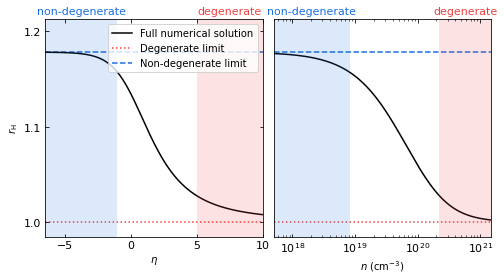

In [245]:
fig = plt.figure(1, figsize=(8,4))
gs = gridspec.GridSpec(1,2)
gs.update(wspace=0.05, hspace=0.25)

xtr_subsplot= fig.add_subplot(gs[0:1,0:1])
plt.plot(eta, rH_SPB(eta,r=r), linestyle='-', color='k', label=r'Full numerical solution', zorder=1)
plt.axhline(rH_deg, linestyle=':', color='#f14040', label = r'Degenerate limit', zorder=0) #degenerate SPB curve
plt.axhline(rH_nondeg(r=r), linestyle='--', color='#1a6fdf', label =r'Non-degenerate limit', zorder=0) #nondegenerate SPB curve
x_min = -6.5
x_max = 10
y_min = 0.985
y_max = 1.2125

plt.xlim([x_min,x_max])
plt.ylim([y_min,y_max])

plt.tick_params(direction='in',which='major', length=3.5, bottom=True, top=True, left=True, right=True)
yticks = np.arange(1,y_max+0.001,0.1)
plt.yticks(yticks)
xticks = np.arange(-5,x_max+0.1,5)
plt.xticks(xticks)
plt.tick_params(labelbottom=True, labeltop=False, labelright=False, labelleft=True, labelsize=11)
plt.ylabel(r'$r_{\mathrm{H}}$')
plt.xlabel(r'$\eta$')
plt.legend()

plt.axvspan(x_min,-1, color='#1a6fdf', alpha=0.15, lw=0)
plt.axvspan(5,x_max, color='#f14040', alpha=0.15, lw=0)
plt.text((x_min+1)/2-1, y_max+y_max*0.0025, 'non-degenerate', ha='center', va='bottom', zorder=5, fontsize=11, color='#1a6fdf')
plt.text((x_max-5)/2+5, y_max+y_max*0.0025, 'degenerate', ha='center', va='bottom', zorder=5, fontsize=11, color='#f14040')

xtr_subsplot= fig.add_subplot(gs[0:1,1:2])
xtr_subsplot.set_xscale('log')

plt.plot(n(eta,T=T, md=md, r=r), rH_SPB(eta,r=r), linestyle='-', color='k', label=r'Full numerical solution', zorder=1)
plt.axhline(rH_deg, linestyle=':', color='#f14040', label = r'Degenerate limit', zorder=0) #degenerate SPB curve
plt.axhline(rH_nondeg(r=r), linestyle='--', color='#1a6fdf', label =r'Non-degenerate limit', zorder=0) #nondegenerate SPB curve

x_min = 5e17
x_max = 1.5e21

plt.xlim([x_min,x_max])
plt.ylim([y_min,y_max])

plt.tick_params(direction='in',which='major', length=3.5, bottom=True, top=True, left=True, right=True)
plt.tick_params(direction='in',which='minor', bottom=True, top=True, left=False, right=False)
yticks = np.arange(0,y_max+1,200)
plt.yticks(yticks)
plt.tick_params(labelbottom=True, labeltop=False, labelright=False, labelleft=False, labelsize=11)
plt.xlabel(r'$n$ (cm$^{-3}$)')

plt.axvspan(x_min,n(-1,T=T, md=md, r=r), color='#1a6fdf', alpha=0.15, lw=0)
plt.axvspan(n(5,T=T, md=md, r=r),x_max, color='#f14040', alpha=0.15, lw=0)
plt.text(np.sqrt(x_min*n(-1,T=T, md=md, r=r)), y_max+y_max*0.0025, 'non-degenerate', ha='center', va='bottom', zorder=5, fontsize=11, color='#1a6fdf')
plt.text(np.sqrt(n(5,T=T, md=md, r=r)*x_max), y_max+y_max*0.0025, 'degenerate', ha='center', va='bottom', zorder=5, fontsize=11, color='#f14040')

#print("Hall factor r_H as a function of (left) chemical potential η and (right) carrier concentration n calculated through numerical solution (black solid curve), 
# the degenerate limit (red dotted curve), and the non-degenerate limit (blue dashed curve).")

Text(5.769804926190367e+20, 0.10250000000000001, 'degenerate')

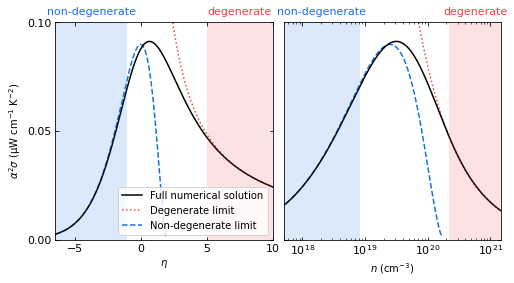

In [246]:
fig = plt.figure(1, figsize=(8,4))
gs = gridspec.GridSpec(1,2)
gs.update(wspace=0.05, hspace=0.25)

xtr_subsplot= fig.add_subplot(gs[0:1,0:1])
plt.plot(eta, PF_SPB(eta,mu_w=mu_w,r=r,T=T), linestyle='-', color='k', label=r'Full numerical solution', zorder=1)
eta_deg = np.linspace(0.01,20,500)
plt.plot(eta_deg, PF_SPB_deg(eta_deg,mu_w=mu_w,r=r,T=T), linestyle=':', color='#f14040', label = r'Degenerate limit', zorder=0) #degenerate SPB curve
eta_limit = np.linspace(-10,1.9,1000)
plt.plot(eta_limit, PF_SPB_nondeg(eta_limit,mu_w=mu_w,r=r,T=T), linestyle='--', color='#1a6fdf', label =r'Non-degenerate limit', zorder=0) #nondegenerate SPB curve
x_min = -6.5
x_max = 10
y_min = 0
y_max = 0.1

plt.xlim([x_min,x_max])
plt.ylim([y_min,y_max])

plt.tick_params(direction='in',which='major', length=3.5, bottom=True, top=True, left=True, right=True)
yticks = np.arange(0,y_max+0.01,0.05)
plt.yticks(yticks)
xticks = np.arange(-5,x_max+0.1,5)
plt.xticks(xticks)
plt.tick_params(labelbottom=True, labeltop=False, labelright=False, labelleft=True, labelsize=11)
plt.ylabel(r'$\alpha^{2}\sigma$ ($\mathrm{\mu}$W cm$^{-1}$ K$^{-2}$)')
plt.xlabel(r'$\eta$')
plt.legend()

plt.axvspan(x_min,-1, color='#1a6fdf', alpha=0.15, lw=0)
plt.axvspan(5,x_max, color='#f14040', alpha=0.15, lw=0)
plt.text((x_min+1)/2-1, y_max+y_max*0.025, 'non-degenerate', ha='center', va='bottom', zorder=5, fontsize=11, color='#1a6fdf')
plt.text((x_max-5)/2+5, y_max+y_max*0.025, 'degenerate', ha='center', va='bottom', zorder=5, fontsize=11, color='#f14040')

xtr_subsplot= fig.add_subplot(gs[0:1,1:2])
xtr_subsplot.set_xscale('log')

plt.plot(n(eta,T=T, md=md, r=r), PF_SPB(eta,mu_w=mu_w,r=r,T=T), linestyle='-', color='k', label=r'Full numerical solution', zorder=1)
plt.plot(n_deg(eta_deg,r=r,T=T,md=md), PF_SPB_deg(eta_deg,mu_w=mu_w,r=r,T=T), linestyle=':', color='#f14040', label = r'Degenerate limit', zorder=0) #degenerate SPB curve
plt.plot(n_nondeg(eta_limit,r=r,T=T,md=md), PF_SPB_nondeg(eta_limit,mu_w=mu_w,r=r,T=T), linestyle='--', color='#1a6fdf', label =r'Non-degenerate limit', zorder=0) #nondegenerate SPB curve

x_min = 5e17
x_max = 1.5e21

plt.xlim([x_min,x_max])
plt.ylim([y_min,y_max])

plt.tick_params(direction='in',which='major', length=3.5, bottom=True, top=True, left=True, right=True)
plt.tick_params(direction='in',which='minor', bottom=True, top=True, left=False, right=False)
yticks = np.arange(0,y_max+1,200)
plt.yticks(yticks)
plt.tick_params(labelbottom=True, labeltop=False, labelright=False, labelleft=False, labelsize=11)
plt.xlabel(r'$n$ (cm$^{-3}$)')

plt.axvspan(x_min,n(-1,T=T, md=md, r=r), color='#1a6fdf', alpha=0.15, lw=0)
plt.axvspan(n(5,T=T, md=md, r=r),x_max, color='#f14040', alpha=0.15, lw=0)
plt.text(np.sqrt(x_min*n(-1,T=T, md=md, r=r)), y_max+y_max*0.025, 'non-degenerate', ha='center', va='bottom', zorder=5, fontsize=11, color='#1a6fdf')
plt.text(np.sqrt(n(5,T=T, md=md, r=r)*x_max), y_max+y_max*0.025, 'degenerate', ha='center', va='bottom', zorder=5, fontsize=11, color='#f14040')

#print("Power factor as a function of (left) chemical potential η and (right) carrier concentration n calculated through numerical solution (black solid curve), 
# the degenerate limit (red dotted curve), and the non-degenerate limit (blue dashed curve).")

Text(5.769804926190367e+20, 0.03075, 'degenerate')

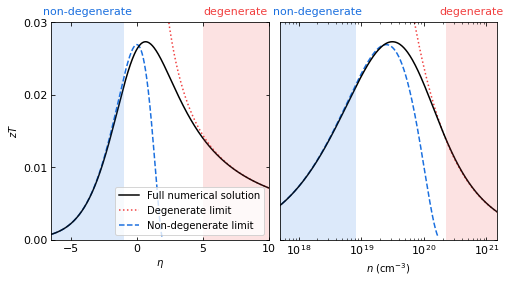

In [247]:
fig = plt.figure(1, figsize=(8,4))
gs = gridspec.GridSpec(1,2)
gs.update(wspace=0.05, hspace=0.25)

xtr_subsplot= fig.add_subplot(gs[0:1,0:1])
plt.plot(eta, zT_SPB(eta,mu_w,kappa_l,r=r,T=T), linestyle='-', color='k', label=r'Full numerical solution', zorder=1)
eta_deg = np.linspace(0.01,20,500)
plt.plot(eta_deg, zT_SPB_deg(eta_deg,mu_w,kappa_l,r=r,T=T), linestyle=':', color='#f14040', label = r'Degenerate limit', zorder=0) #degenerate SPB curve
eta_limit = np.linspace(-10,1.9,1000)
plt.plot(eta_limit, zT_SPB_nondeg(eta_limit,mu_w,kappa_l,r=r,T=T), linestyle='--', color='#1a6fdf', label =r'Non-degenerate limit', zorder=0) #nondegenerate SPB curve
x_min = -6.5
x_max = 10
y_min = 0
y_max = 0.03

plt.xlim([x_min,x_max])
plt.ylim([y_min,y_max])

plt.tick_params(direction='in',which='major', length=3.5, bottom=True, top=True, left=True, right=True)
yticks = np.arange(0,y_max+0.001,0.01)
plt.yticks(yticks)
xticks = np.arange(-5,x_max+0.1,5)
plt.xticks(xticks)
plt.tick_params(labelbottom=True, labeltop=False, labelright=False, labelleft=True, labelsize=11)
plt.ylabel(r'$zT$')
plt.xlabel(r'$\eta$')
plt.legend()

plt.axvspan(x_min,-1, color='#1a6fdf', alpha=0.15, lw=0)
plt.axvspan(5,x_max, color='#f14040', alpha=0.15, lw=0)
plt.text((x_min+1)/2-1, y_max+y_max*0.025, 'non-degenerate', ha='center', va='bottom', zorder=5, fontsize=11, color='#1a6fdf')
plt.text((x_max-5)/2+5, y_max+y_max*0.025, 'degenerate', ha='center', va='bottom', zorder=5, fontsize=11, color='#f14040')

xtr_subsplot= fig.add_subplot(gs[0:1,1:2])
xtr_subsplot.set_xscale('log')

plt.plot(n(eta,T=T, md=md, r=r), zT_SPB(eta,mu_w,kappa_l,r=r,T=T), linestyle='-', color='k', label=r'Full numerical solution', zorder=1)
plt.plot(n_deg(eta_deg,r=r,T=T,md=md), zT_SPB_deg(eta_deg,mu_w,kappa_l,r=r,T=T), linestyle=':', color='#f14040', label = r'Degenerate limit', zorder=0) #degenerate SPB curve
plt.plot(n_nondeg(eta_limit,r=r,T=T,md=md), zT_SPB_nondeg(eta_limit,mu_w,kappa_l,r=r,T=T), linestyle='--', color='#1a6fdf', label =r'Non-degenerate limit', zorder=0) #nondegenerate SPB curve

x_min = 5e17
x_max = 1.5e21

plt.xlim([x_min,x_max])
plt.ylim([y_min,y_max])

plt.tick_params(direction='in',which='major', length=3.5, bottom=True, top=True, left=True, right=True)
plt.tick_params(direction='in',which='minor', bottom=True, top=True, left=False, right=False)
yticks = np.arange(0,y_max+1,200)
plt.yticks(yticks)
plt.tick_params(labelbottom=True, labeltop=False, labelright=False, labelleft=False, labelsize=11)
plt.xlabel(r'$n$ (cm$^{-3}$)')

plt.axvspan(x_min,n(-1,T=T, md=md, r=r), color='#1a6fdf', alpha=0.15, lw=0)
plt.axvspan(n(5,T=T, md=md, r=r),x_max, color='#f14040', alpha=0.15, lw=0)
plt.text(np.sqrt(x_min*n(-1,T=T, md=md, r=r)), y_max+y_max*0.025, 'non-degenerate', ha='center', va='bottom', zorder=5, fontsize=11, color='#1a6fdf')
plt.text(np.sqrt(n(5,T=T, md=md, r=r)*x_max), y_max+y_max*0.025, 'degenerate', ha='center', va='bottom', zorder=5, fontsize=11, color='#f14040')

#print("Power factor as a function of (left) chemical potential η and (right) carrier concentration n calculated through numerical solution (black solid curve), 
# the degenerate limit (red dotted curve), and the non-degenerate limit (blue dashed curve).")

Jonker plot is also useful for analysis, please, see [this paper](https://doi.org/10.48550/arXiv.2502.03837) for details.

Text(33.700021953323, 410.0, 'degenerate')

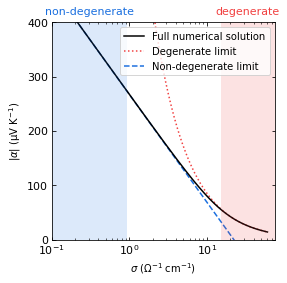

In [248]:
fig = plt.figure(1, figsize=(4,4))
gs = gridspec.GridSpec(1,1)
gs.update(wspace=0.05, hspace=0.25)

xtr_subsplot= fig.add_subplot(gs[0:1,0:1])
xtr_subsplot.set_xscale('log')

plt.plot(sigma_SPB(eta,mu_w=1,r=r,T=T), a_SPB(eta,r=r), linestyle='-', color='k', label=r'Full numerical solution', zorder=1)
eta_deg = np.linspace(0.01,20,500)
plt.plot(sigma_SPB_deg(eta_deg,mu_w=1,r=r,T=T), a_SPB_deg(eta_deg,r=r), linestyle=':', color='#f14040', label = r'Degenerate limit', zorder=0) #degenerate SPB curve
plt.plot(sigma_SPB_nondeg(eta,mu_w=1,r=r,T=T), a_SPB_nondeg(eta,r=r), linestyle='--', color='#1a6fdf', label =r'Non-degenerate limit', zorder=0) #nondegenerate SPB curve
x_min = 1e-1
x_max = 7.5e1
y_min = 0
y_max = 400

plt.xlim([x_min,x_max])
plt.ylim([y_min,y_max])

plt.tick_params(direction='in',which='major', length=3.5, bottom=True, top=True, left=True, right=True)
plt.tick_params(direction='in',which='minor', bottom=True, top=True, left=False, right=False)
yticks = np.arange(0,y_max+1,100)
plt.yticks(yticks)
#xticks = np.arange(-5,x_max+0.1,5)
#plt.xticks(xticks)
plt.tick_params(labelbottom=True, labeltop=False, labelright=False, labelleft=True, labelsize=11)
plt.ylabel(r'$|\alpha|$ ($\mathrm{\mu}$V K$^{-1}$)')
plt.xlabel(r'$\sigma$ ($\Omega^{-1}$ cm$^{-1}$)')
plt.legend()

plt.axvspan(x_min,sigma_SPB(-1,mu_w=1,r=r,T=T), color='#1a6fdf', alpha=0.15, lw=0)
plt.axvspan(sigma_SPB(5,mu_w=1,r=r,T=T),x_max, color='#f14040', alpha=0.15, lw=0)
plt.text(np.sqrt(x_min*sigma_SPB(-1,mu_w=1,r=r,T=T)), y_max+y_max*0.025, 'non-degenerate', ha='center', va='bottom', zorder=5, fontsize=11, color='#1a6fdf')
plt.text(np.sqrt(sigma_SPB(5,mu_w=1,r=r,T=T)*x_max), y_max+y_max*0.025, 'degenerate', ha='center', va='bottom', zorder=5, fontsize=11, color='#f14040')

#print("Carrier concentration n as a function of chemical potential η calculated through numerical solution (black solid curve), 
# the degenerate limit (red dotted curve), and the non-degenerate limit (blue dashed curve).")

#### Experimantal Data Analysis

- Дальше на экспериментальных данных показать (для концентрационной зависимости при какой-то температуре)
- Потом показать фит температурной зависимости (может быть слишком сложно..)
- Потом краткое введение в ту бенд, линейную и т.п. со ссылками сибенд, бхарти и т.п.